# Sommaire :

<a href="#A1">**Part 1 : Preliminary**</a>

<a href="#A2">**Part 2 : Cleaning and data exploration**</a>

## <a name="A1">**Part 1 : Preliminary**</a>

In [4]:
#Général
import numpy as np
import pandas as pd
import os
import datetime
import time

#Traitement du texte
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from sklearn.preprocessing import LabelEncoder

#Feature extraction
#Bag  of word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Word embedding
import tensorflow as TF
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

# BERT
import transformers
from sentence_transformers import SentenceTransformer

#Classification
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import adjusted_rand_score
from nltk.classify import accuracy
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, auc

#model selection
from sklearn.model_selection import GridSearchCV, train_test_split

#Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import plotly.graph_objs as go

#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
# Descriptions produits
df = pd.read_csv(r"flipkart_com-ecommerce_sample_1050.csv")
#rw_mount('https://formation8255568772.blob.core.windows.net/azureml-blobstore-d91abf03-c366-4a10-aee4-ab1872147e47')

In [6]:
# Images
im = "Images"
#im = r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\Images"

In [7]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
951,edec3bb5df9c4bc618752e94532bb36e,2016-01-01 13:15:34 +0000,http://www.flipkart.com/art-treasure-decorativ...,The Art Treasure Decorative Shankh,"[""Home Decor & Festive Needs >> Religion & Dev...",SNKEBPVFVGG8A5UR,3800.0,2900.0,edec3bb5df9c4bc618752e94532bb36e.jpg,False,Buy The Art Treasure Decorative Shankh for Rs....,No rating available,No rating available,The Art Treasure,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
220,32cf0691248297655e2c1728b12e2262,2015-12-01 12:40:44 +0000,http://www.flipkart.com/poppins-printed-baby-b...,Poppins Printed Baby Boy's Jumpsuit,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",JUMECNJURHHGKSXR,1099.0,100.0,32cf0691248297655e2c1728b12e2262.jpg,False,Poppins Printed Baby Boy's Jumpsuit\r\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""value""=>""Jumsuits..."
941,c12fd368ff03f5224b92771824cafb9c,2016-01-01 13:15:34 +0000,http://www.flipkart.com/intellect-bazaar-geome...,The Intellect Bazaar Geometric Single Blanket ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE3YZ4ZGKEWYS,1999.0,1299.0,c12fd368ff03f5224b92771824cafb9c.jpg,False,The Intellect Bazaar Geometric Single Blanket ...,No rating available,No rating available,The Intellect Bazaar,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
954,bba68d75eff1b7b5eef7f6c1c68f2227,2016-01-01 13:15:34 +0000,http://www.flipkart.com/intellect-bazaar-plain...,The Intellect Bazaar Plain King Blanket Grey,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE4WUZEHPYMRH,3499.0,999.0,bba68d75eff1b7b5eef7f6c1c68f2227.jpg,False,Buy The Intellect Bazaar Plain King Blanket Gr...,No rating available,No rating available,The Intellect Bazaar,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
60,4a1b23dacd7d2a9ec7414f7159f25a48,2016-06-02 08:05:27 +0000,http://www.flipkart.com/mars-queen-eye-liner-l...,"Mars Queen Eye Liner, Lip Gloss, EyeLiner","[""Beauty and Personal Care >> Combos and Kits ...",CBKEJ5Q6KRZM6CZN,499.0,299.0,4a1b23dacd7d2a9ec7414f7159f25a48.jpg,False,"Mars Queen Eye Liner, Lip Gloss, EyeLiner (Set...",No rating available,No rating available,Mars,"{""product_specification""=>[{""key""=>""Number of ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [9]:
#print('nb d\'images : ',len(os.listdir(im)))

## <a name="A2">**Part 2 : Cleaning and data exploration**</a>

## Cleaning missing values:

In [10]:
df.drop(columns = 'brand', inplace = True)
df.dropna(axis = 'rows', how = 'any', inplace = True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1048 non-null   object 
 1   crawl_timestamp          1048 non-null   object 
 2   product_url              1048 non-null   object 
 3   product_name             1048 non-null   object 
 4   product_category_tree    1048 non-null   object 
 5   pid                      1048 non-null   object 
 6   retail_price             1048 non-null   float64
 7   discounted_price         1048 non-null   float64
 8   image                    1048 non-null   object 
 9   is_FK_Advantage_product  1048 non-null   bool   
 10  description              1048 non-null   object 
 11  product_rating           1048 non-null   object 
 12  overall_rating           1048 non-null   object 
 13  product_specifications   1048 non-null   object 
dtypes: bool(1), float64(2), 

## Feature engineering :

In [11]:
regexp_cat = '\[\"(?P<cat_1>[\w\s&,\']+)>>(?P<cat_2>[\w\s&,\']+)>*(?P<cat_3>[\w\s&,\']*).*'

In [12]:
def get_cat(text, regexp, name):

    """ Test a regexp on a text, if here is a mach return the stripped specified named group."""

    match = re.match(regexp, text)
    if match is None:
        pass
    else:
        return match.group(name).strip()

In [13]:
# on crée une colonne class
df["class_"] = df["product_category_tree"].apply(lambda x: get_cat(x, regexp_cat, 'cat_1'))

In [14]:
# les classes
df['class_'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [15]:
df.loc[df['class_'] == 'Home Furnishing','class_'].count()

150

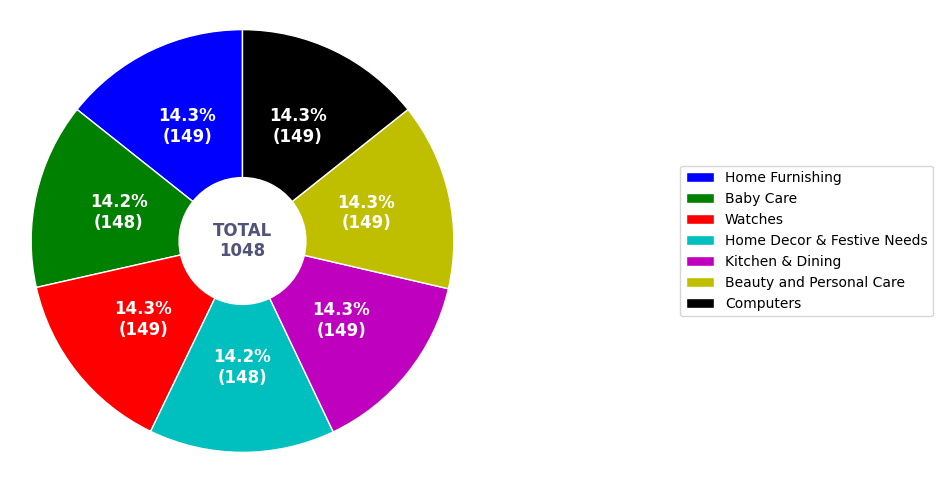

In [16]:
# decoupage du dataset par classe
import matplotlib.colors as mcolors
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

classes = list(df['class_'].unique())

sizes = []
for c in classes :
    sizes.append(df.loc[df['class_'] == c,'class_'].count())
fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=mcolors.BASE_COLORS,#['#0066ff','#bb66ff','#cc66ff','#dd66ff','#ee66ff','#ff66ff','#gg66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, classes,
           loc='center right',
           bbox_to_anchor=(1.5, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(df['class_'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

## Cleaning and tokenizing column ‘Description’ :

In [17]:
# Lower case
df["cleaned"] = df['description'].apply(lambda x: x.lower())
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel (...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch - for ...


In [18]:
# Punctuation removal function
def remove_punct(text):
    """
        Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    #return text.translate(str.maketrans('', '', string.punctuation))

In [19]:
# Remove punctuations from the text
df["cleaned"] = df["cleaned"].apply(lambda x: remove_punct(x))
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel 3...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch for b...


In [20]:
# Tokenizing
from nltk.tokenize import word_tokenize

df['tokenized'] = df['cleaned'].apply(word_tokenize)
df[['cleaned','tokenized']].head()

,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, of, sathiyas, cotton, bath, t..."
2,key features of santosh royal fashion cotton p...,"[key, features, of, santosh, royal, fashion, c..."
3,key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, f..."


In [21]:
# Removing stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, elegance, polyester, multicolo..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, sathiyas, cotton, bath, towel..."
2,key features of santosh royal fashion cotton p...,"[key, features, santosh, royal, fashion, cotto..."
3,key features of jaipur print cotton floral kin...,"[key, features, jaipur, print, cotton, floral,..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, b..."


In [22]:
# Removing non english word
nltk.download('words')
words = set(nltk.corpus.words.words())

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word in words])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package words to /home/azureuser/nltk_data...
[nltk_data]   Package words is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, elegance, polyester, multicolor, abstrac..."
1,specifications of sathiyas cotton bath towel 3...,"[cotton, bath, towel, bath, towel, red, yellow..."
2,key features of santosh royal fashion cotton p...,"[key, royal, fashion, cotton, printed, king, s..."
3,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub..."
4,maserati time r8851116001 analog watch for b...,"[time, watch, buy, time, watch, great, genuine..."


In [23]:
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

for i in range(1048) : 
    df['tokenized'][i] = lemma_fct(df['tokenized'][i])
df[['cleaned','tokenized']].sample(5)

/tmp/ipykernel_5751/1887817126.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'][i] = lemma_fct(df['tokenized'][i])


,cleaned,tokenized
389,buy tplink 4port cabledsltlr460 only for rs 11...,"[buy, genuine, day, replacement, guarantee, fr..."
413,flipkartcom buy playboy london and new york co...,"[buy, playboy, new, york, set, genuine, day, r..."
320,buy apple md199hna only for rs 5900 from flipk...,"[buy, apple, genuine, day, replacement, guaran..."
623,specifications of oxolloxo solid single breast...,"[solid, single, breasted, casual, blazer, gene..."
53,key features of jrb 1033 smallest mobile power...,"[key, mobile, powered, android, smart, phone, ..."


In [24]:
# Prerequisite for CountVectorizer : aggregate the words into a sentence
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df['combined'] = df['tokenized'].apply(lambda x : combine_text(x))
df[['tokenized','combined']].head()

,tokenized,combined
0,"[key, elegance, polyester, multicolor, abstrac...",key elegance polyester multicolor abstract eye...
1,"[cotton, bath, towel, bath, towel, red, yellow...",cotton bath towel bath towel red yellow blue b...
2,"[key, royal, fashion, cotton, printed, king, s...",key royal fashion cotton printed king sized do...
3,"[key, print, cotton, floral, king, sized, doub...",key print cotton floral king sized double prin...
4,"[time, watch, buy, time, watch, great, genuine...",time watch buy time watch great genuine day re...


## Data exploration :

Text(0.5, 0, 'nb of word')

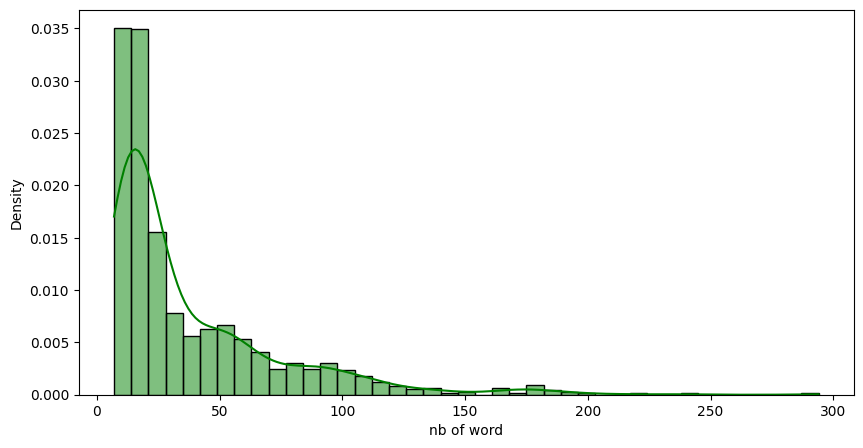

In [25]:
# distribution du nombre de mot par description après tokenization
data = [len(i) for i in df.tokenized]
plt.figure(figsize=(10,5))
ax = sns.histplot(data,color="green",kde=True, stat="density")
ax.set_xlabel("nb of word")

In [26]:
# Pareto de la fréquence des mots
voc = set()
corpus = []
data = {}

for i in [j for j in df.tokenized]:
    voc = set(i) | voc
    for k in i :
        corpus.append(k)

for i in voc : 
    data[i] = corpus.count(i)
data = pd.DataFrame(list(data.items()),columns = ['word','count']) 

In [27]:
data.sort_values('count', ascending = False, inplace = True)

Text(0.5, 0, 'nb of word in corpus')

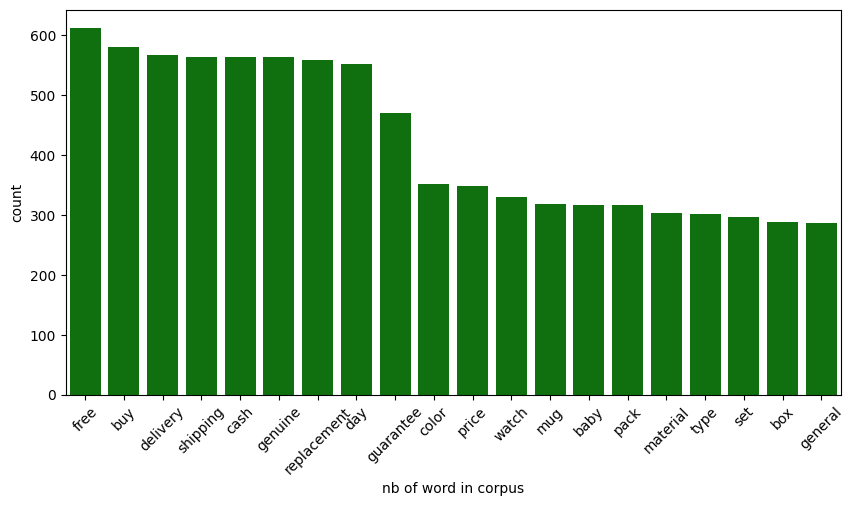

In [28]:
# Visualisation
plt.figure(figsize=(10,5))
ax = sns.barplot(x = data['word'][0:20],y = data['count'][0:20],color="green")
plt.xticks(rotation=45,fontsize=10)
ax.set_xlabel("nb of word in corpus")

In [29]:
df.to_csv('df.csv',index=False)